In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.ndimage import gaussian_filter

from scipy.ndimage import gaussian_filter1d

In [14]:
# load HH model
from HH_helper_functions import syn_current, HHsimulator

duration = 40
t_on = 2


def run_HH_model(params, duration, t_on=5):
    """
    Run the HH model with the given parameters.
    params: array of parameters (current_scaling, gbar_Na, gbar_K)
    """

    params = np.asarray(params)

    # input current, time step
    I_inj, t_on, t_off, dt, t, A_soma = syn_current(duration, t_on=t_on)
    # scale input current according to the first parameter
    I_inj *= params[0]

    t = np.arange(0, len(I_inj), 1) * dt

    # initial voltage V0
    initial_voltage = -70

    voltage_trace = HHsimulator(
        initial_voltage, params[1:].reshape(1, -1), dt, t, I_inj
    )

    return dict(data=voltage_trace.reshape(-1), time=t, dt=dt, I_inj=I_inj.reshape(-1))


# current, onset time of stimulation, offset time of stimulation, time step, time, area of some
I_inj, t_on, t_off, dt, t, A_soma = syn_current(duration=duration, t_on=t_on)

In [15]:
# three sets of (current_scale, g_Na, g_K)
# params = np.array([ [4.0, 1.5], [20.0, 15.0]])

params = np.array([[1.1, 12.0, 10.0], [1.5, 18.0, 15.0]])


num_samples = len(params[:, 0])
sim_samples = np.zeros((num_samples, len(I_inj)))
for i in range(num_samples):
    sim_samples[i, :] = run_HH_model(params=params[i, :], duration=duration)["data"]

In [16]:
# colors for traces
col_min = 2
num_colors = num_samples + col_min
cm1 = mpl.cm.Blues
col1 = [cm1(1.0 * i / num_colors) for i in range(col_min, num_colors)]

# or simple red black
col1 = ["#AA0000", "black"]

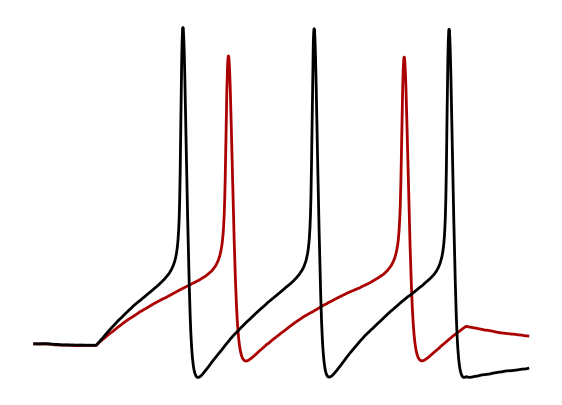

In [17]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(7.0, 5))
    for i in range(num_samples):
        ax.plot(t, sim_samples[i, :], color=col1[i], lw=2)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

#     plt.savefig("svg/HH_traces.svg", bbox_inches="tight", transparent=True)

## general time series example

In [34]:
np.random.seed(5)

# Create a sample time series
t = np.arange(0, 9, 0.05)
x = np.zeros((2, t.shape[0]))
x[:, 0] = 0
for i in range(1, t.shape[0]):
    x[:, i] = 0.95 * x[:, i - 1] + np.random.randn(2)

# additional shift
x[1] += 0

# Perform convolution with the Gaussian filter
sigma = 1.8
x_conv = gaussian_filter1d(x, sigma)

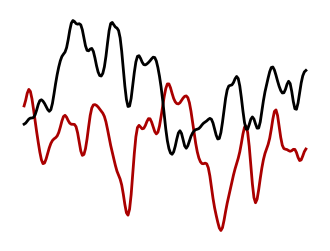

In [35]:
# or simple red black
col1 = ["#AA0000", "black"]

with mpl.rc_context(fname="../../.matplotlibrc"):
    # fig, ax = plt.subplots(1, 1, figsize=(7.0, 5))
    fig, ax = plt.subplots(1, 1, figsize=(4.0, 3))

    ax.plot(t, x_conv[0], color=col1[0], lw=2)
    ax.plot(t, x_conv[1], color=col1[1], lw=2)

    # ax.plot(t, x[0], color=col1[0], lw=2)
    # ax.plot(t, x[1], color=col1[1], lw=2)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.savefig("svg/time_series_traces.svg", bbox_inches="tight", transparent=True)

In [36]:
np.random.seed(5)

n = 30

# Create a sample time series
t = np.arange(0, 9, 0.4)
x = np.zeros((n, t.shape[0]))
x[:, 0] = 0
for i in range(1, t.shape[0]):
    x[:, i] = 0.95 * x[:, i - 1] + np.random.randn(n)

# additional shift
x[1] += 0

# Perform convolution with the Gaussian filter
sigma = 1.8
x_conv = gaussian_filter1d(x, sigma)

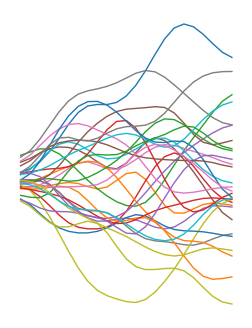

In [38]:
# or simple red black
col1 = ["#AA0000", "black"]

with mpl.rc_context(fname="../../.matplotlibrc"):
    # fig, ax = plt.subplots(1, 1, figsize=(7.0, 5))
    fig, ax = plt.subplots(1, 1, figsize=(3.0, 4))

    for i in range(n):
        ax.plot(t, x_conv[i], lw=1)

    # ax.plot(t, x[0], color=col1[0], lw=2)
    # ax.plot(t, x[1], color=col1[1], lw=2)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

plt.savefig("svg/time_series_traces_many.svg", bbox_inches="tight", transparent=True)